In [1]:
 # Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func

In [2]:
# Create engine using the `ev_charging_stations.sqlite` database file
engine = create_engine("sqlite:///ev_charging_stations.sqlite")

In [3]:
  # Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

ev_charging_stations
--------
Station ID TEXT
Latitude FLOAT
Longitude FLOAT
Address TEXT
Charger Type TEXT
Cost (USD/kWh) FLOAT
Distance to City (km) FLOAT
Usage Stats (avg users/day) BIGINT
Station Operator TEXT
Charging Capacity (kW) BIGINT
Connector Types TEXT
Installation Year BIGINT
Renewable Energy Source TEXT
Reviews (Rating) FLOAT
Parking Spots BIGINT
Maintenance Frequency TEXT



In [4]:
 conn = engine.connect() # Raw SQL/Pandas

In [5]:
#RAW SQL
query = text("""SELECT "Installation Year", COUNT(*) AS station_count
    FROM ev_charging_stations
    GROUP BY "Installation Year"
    ORDER BY "Installation Year";
""")

df1 = pd.read_sql(query, con=conn)
df1.head(10)

,Installation Year,station_count
0,2010,337
1,2011,337
2,2012,350
3,2013,373
4,2014,335
5,2015,385
6,2016,346
7,2017,374
8,2018,354
9,2019,345


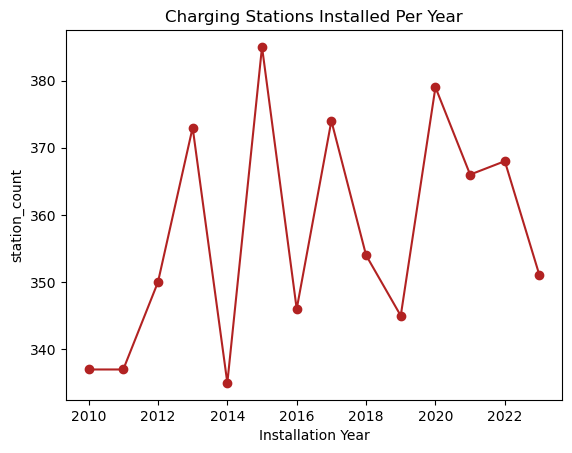

In [36]:
#Visualization: Line chart showing the number of charging stations installed per year.
plt.plot(df1["Installation Year"], df1["station_count"], marker="o", color="firebrick", linestyle="-")
plt.title("Charging Stations Installed Per Year")
plt.xlabel("Installation Year")
plt.ylabel("station_count")
plt.show()


In [28]:
#RAW SQL
query = text("""SELECT "Cost (USD/kWh)", "Usage Stats (avg users/day)"
FROM ev_charging_stations;
""")

df = pd.read_sql(query, con=conn)
df.head(10)

,Cost (USD/kWh),Usage Stats (avg users/day)
0,0.27,35
1,0.19,83
2,0.48,24
3,0.41,70
4,0.11,19
5,0.22,39
6,0.40,89
7,0.26,72
8,0.49,68
9,0.37,82


In [ ]:
#Visualization: Scatter plot to explore if lower charging costs lead to higher usage.

In [ ]:
#RAW SQL
query = text("""SELECT "Latitude", "Longitude"
FROM ev_charging_stations;
""")

df = pd.read_sql(query, con=conn)
df.head(10)

In [ ]:
#Visualization: Heatmap displaying the density of charging stations geographically.

In [ ]:
#RAW SQL
query = text("""SELECT "Renewable Energy Source", COUNT(*) AS count
FROM ev_charging_stations
GROUP BY "Renewable Energy Source";
""")

df = pd.read_sql(query, con=conn)
df.head(10)

In [ ]:
#Visualization: Pie chart showing the percentage of stations powered by renewable energy vs. non-renewable sources.
RenewableSource = ["yes", "no"]
count = [2566, 2434]
colors = ["green", "blue"]
explode = (0, 0.05)

plt.title("renewable vs non-renewable")
plt.pie(count, explode=explode, labels=RenewableSource, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()